In [4]:
import gzip
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [10]:
def filter_interaction_df(df, chrA=None, chrA_positions=None, chrB=None, chrB_positions=None):
    '''
    This function filters interactions according to chrA and chrB specified.Also, a window of positions
    can be provided for those chromosomes.
    
    Parameters
    __________
    
    df : DataFrame
        Pandas DataFrame containing interactions.
    
    chrA : str
        Chromosome to keep in column chrA of df. None by default.
        
    chrA_positions : tuple
        Tuple containing the start and the end of the windows of interactions. They corresponds to positions in
        chrA (posA in df). None by default.
        
    chrB : str
        Chromosome to keep in column chrB of df. None by default.
        
    chrB_positions : tuple
        Tuple containing the start and the end of the windows of interactions. They corresponds to positions in
        chrB (posB in df). None by default.
        
    Returns
    _______
    
    df_ : DataFrame
        Pandas dataframe containing all interactions after filtering df.
    '''
    df_ = df.copy()

    if chrA is not None:
        if chrA_positions is not None:
            df_ = df_.loc[(df_['chrA'] == chrA) & \
                          (df_['posA'].between(chrA_positions[0], chrA_positions[1], inclusive=True))]
        else:
            raise ValueError("Specify positions for ChrA")
            
    if chrB is not None:
        if chrB_positions is not None:
            df_ = df_.loc[(df_['chrB'] == chrB) & \
                          (df_['posB'].between(chrB_positions[0], chrB_positions[1], inclusive=True))]
        else:
            raise ValueError("Specify positions for ChrB")
    
    return df_

# Load Files

In [5]:
significant_HEK_file = '/Users/earmingol/Dropbox/Universidad/UCSanDiego/Cursos/BENG203/Project/FitHiC/FitHiC.spline_pass1.res40000_hek.significances.txt.flt'
significant_HFF_file = '/Users/earmingol/Dropbox/Universidad/UCSanDiego/Cursos/BENG203/Project/FitHiC/FitHiC.spline_pass1.res40000_hff.significances.txt.flt'

In [6]:
new_cols = ['chrA', 'posA', 'chrB', 'posB', 'contactCount', 'p-value', 'q-value', 'bias1', 'bias2']

In [7]:
significant_HEK = pd.read_table(significant_HEK_file)
significant_HEK.columns = new_cols

/Users/earmingol/anaconda3/envs/DataVisualization/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


In [8]:
significant_HEK.head()

,chrA,posA,chrB,posB,contactCount,p-value,q-value,bias1,bias2
0,chr1,760000,chr1,110240000,2,7.283664e-11,0.024504,1.0,1.0
1,chr1,920000,chr1,1320000,4,1.417444e-12,0.000499,1.0,1.0
2,chr1,920000,chr1,89640000,2,1.169054e-10,0.039039,1.0,1.0
3,chr1,920000,chr1,147640000,2,4.627494e-11,0.015698,1.0,1.0
4,chr1,960000,chr1,1240000,5,2.380460e-15,0.000003,1.0,1.0


In [9]:
significant_HFF = pd.read_table(significant_HFF_file)
significant_HFF.columns = new_cols

/Users/earmingol/anaconda3/envs/DataVisualization/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


In [11]:
significant_HFF.head()

,chrA,posA,chrB,posB,contactCount,p-value,q-value,bias1,bias2
0,chr1,600000,chr1,162560000,2,4.919350e-11,0.007639,1.0,1.0
1,chr1,600000,chr1,169520000,2,4.542896e-11,0.007062,1.0,1.0
2,chr1,840000,chr1,226440000,2,1.848807e-11,0.002890,1.0,1.0
3,chr1,1240000,chr1,156160000,2,5.302499e-11,0.008225,1.0,1.0
4,chr1,1360000,chr1,119600000,2,7.695194e-11,0.011864,1.0,1.0


# Filter Tables

In [34]:
bins = 1000

In [35]:
filtered_sig_HEK = filter_interaction_df(significant_HEK,
                                         chrA='chr11', 
                                         chrA_positions=(60000000, 67000000))

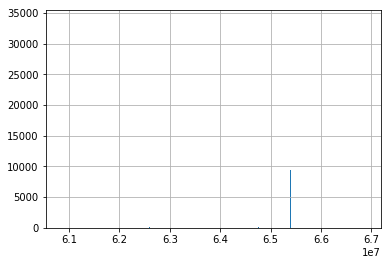

In [36]:
hist_HEK = filtered_sig_HEK.posA.hist(bins=bins)

In [38]:
pd.cut(filtered_sig_HEK['posA'], bins).value_counts().sort_values(ascending=False).head()

(62839240.0, 62845280.0]    33715
(65478720.0, 65484760.0]    24592
(65394160.0, 65400200.0]     9433
(65436440.0, 65442480.0]     3111
(66318280.0, 66324320.0]      760
Name: posA, dtype: int64

In [28]:
filtered_sig_HFF = filter_interaction_df(significant_HFF,
                                         chrA='chr11', 
                                         chrA_positions=(60000000, 67000000))

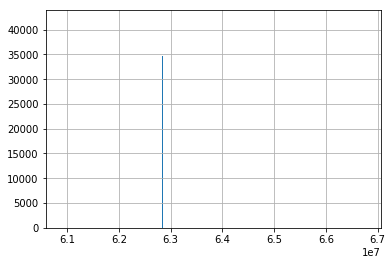

In [39]:
hist_HFF = filtered_sig_HFF.posA.hist(bins=bins)

In [40]:
pd.cut(filtered_sig_HFF['posA'], 100).value_counts().sort_values(ascending=False).head()

(65466400.0, 65525200.0]    41799
(62820400.0, 62879200.0]    34595
(65348800.0, 65407600.0]    17766
(65407600.0, 65466400.0]     2825
(62467600.0, 62526400.0]     1377
Name: posA, dtype: int64

# Detect genes

In [103]:
def read_gff(filename, file_format='gzip'):
    '''
    This function reads a .pairs or .pairs.gz generated from iMARGI.
    
    Parameters
    __________
    
    filename : str
        It is the path to the iMARGI file.
    file_format : str
        It could be gzip or uncompress. Here, we use gzip by default.
        
    Returns
    _______
    
    df : DataFrame
        Pandas dataframe containing all interactions. Columns are 'chrA', 'posA', 'chrB' and 'posB'.
    '''
    entries = []
    if file_format == 'gzip':
        with gzip.open(filename, 'rb') as f:
            for i, line in enumerate(f):
                if i % 10000 == 0:
                    print("Reading line {}".format(i))
                    
                line = line.decode()
                #if line.startswith('#'):
                if line[0] == '#':
                    continue 

                vals = line.split('\t')
                seqname = vals[0]
                feature = vals[2]
                start = vals[3]
                end = vals[4]
                idx = vals[8].split(';').lstrip('ID=')
                
                
                start, end = int(start), int(end)
                
                entries.append((idx, feature, start, end, seqname))
    else:
        with open(filename, 'rb') as f:
            for i, line in enumerate(f):
                if i % 10000 == 0:
                    print("Reading line {}".format(i))
                    
                #if line.startswith('#'):
                line = line.decode()
                if line[0] == '#':
                    continue 

                vals = line.split('\t')
                seqname = vals[0]
                feature = vals[2]
                start = vals[3]
                end = vals[4]
                idx = vals[8].split(';')[0].lstrip('ID=')
                
                
                start, end = int(start), int(end)
                
                entries.append((idx, feature, start, end, seqname))
                
    df = pd.DataFrame.from_records(entries, columns=['Id', 'Type', 'Start', 'End', 'Location'])
    df.set_index('Id', inplace=True)
    del entries
    return df

In [104]:
gff_file = './chr11_GRCh38_latest_genomic.gff'

In [105]:
GFF = read_gff(gff_file, file_format='gff')

Reading line 0
Reading line 10000
Reading line 20000
Reading line 30000
Reading line 40000
Reading line 50000
Reading line 60000
Reading line 70000
Reading line 80000
Reading line 90000
Reading line 100000
Reading line 110000
Reading line 120000
Reading line 130000
Reading line 140000
Reading line 150000
Reading line 160000
Reading line 170000
Reading line 180000


In [106]:
GFF.head()

,Type,Start,End,Location
Id,,,,
NC_000011.10:1..135086622,region,1,135086622,NC_000011.10
gene-WBP1LP10,pseudogene,75780,76143,NC_000011.10
gene-OR4F2P,pseudogene,86649,87586,NC_000011.10
id-OR4F2P,exon,86649,87586,NC_000011.10
gene-SEPT14P11,pseudogene,118850,121428,NC_000011.10


In [107]:
GFF['HEK'] = GFF.apply(lambda row: len(filtered_sig_HEK['posA'].loc[filtered_sig_HEK['posA'].between(row['Start'],
                                                                                                    row['End'],
                                                                                                    inclusive=True)]),
                      axis=1)

In [109]:
GFF['HFF'] = GFF.apply(lambda row: len(filtered_sig_HFF['posA'].loc[filtered_sig_HFF['posA'].between(row['Start'],
                                                                                                    row['End'],
                                                                                                    inclusive=True)]),
                      axis=1)

In [115]:
GFF.loc[GFF['Type']=='gene'].sort_values(by='HEK', ascending=False).head()

,Type,Start,End,Location,HEK,HFF
Id,,,,,,
gene-WDR74,gene,62832321,62840426,NC_000011.10,33715,34595
gene-FRMD8,gene,65386570,65413525,NC_000011.10,9433,17766
gene-NEAT1,gene,65422798,65445540,NC_000011.10,3111,2825
gene-RBM14-RBM4,gene,66616582,66646473,NC_000011.10,226,12
gene-RBM4,gene,66638617,66668385,NC_000011.10,226,12


In [116]:
GFF.loc[GFF['Type']=='gene'].sort_values(by='HFF', ascending=False).head()

,Type,Start,End,Location,HEK,HFF
Id,,,,,,
gene-WDR74,gene,62832321,62840426,NC_000011.10,33715,34595
gene-FRMD8,gene,65386570,65413525,NC_000011.10,9433,17766
gene-NEAT1,gene,65422798,65445540,NC_000011.10,3111,2825
gene-AHNAK,gene,62433542,62546860,NC_000011.10,6,1377
gene-PLA2G16,gene,63574462,63616926,NC_000011.10,4,32
